Title: Does number of hours of Minecraft played and the Age of the player affect whether they will subscribe to a related newsletter? - Ridhi Ridhi (47630603)

Video games like Minecraft, allow us another way to study human behavior and interaction. Frank Wood's Computer Science research group at UBC uses a Minecraft server to collect detailed player data. Operating this server effectively requires predicting player engagement and server usage to manage resources (like software licenses and hardware) and optimize player recruitment. This project aims to identify player characteristics and behaviors that predict engagement, specifically newsletter subscriptions, to help the UBC team refine their operational and recruitment strategies.

Research question: Can played hours and age predict whether a player will subscribe to a game-related newsletter in the players.csv dataset? This is the question I plan on answering in this project, using classification having whether players subscribe be the response variable. 

The players.csv dataset contains information about players on a Minecraft research server operated by Frank Wood's Computer Science research group at UBC. This dataset is used to understand player characteristics and behaviors that were observed when they played on Minecraft. 
The dataset has: 
- 196 observations
- 7 variables

The variables are as follows:
- experience (chr): describes the level of experience shown by the particular player
- subscribe(lgl): says whether the player is subscribed or not to the newsletter
- hashedEmail (chr): contains data of the email ids of the players
- played_hours (dbl) : tells us the number of hours the player has played for
- name (chr) : is the name of the player
- gender (chr): tells us the gender of the player
- Age (dbl) : tells us the age of the player

First step is loading the libraries needed to perform the data analysis

In [41]:
#firstly loading all the libraries necessary
library(tidyverse)
library(tidymodels)


The next step is loading our data in R

In [42]:
players_untidy <- read_csv("players.csv") 
players_untidy

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Now I will tidy the data to only include the variables we are interested in so the dataset will contain played_hours, subscribe, and age.

In [43]:
players <- players_untidy |>
        select(subscribe, played_hours, Age)
players

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


Let us plot this data to visualize it first. This helps gain an initial understnading of the data 

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


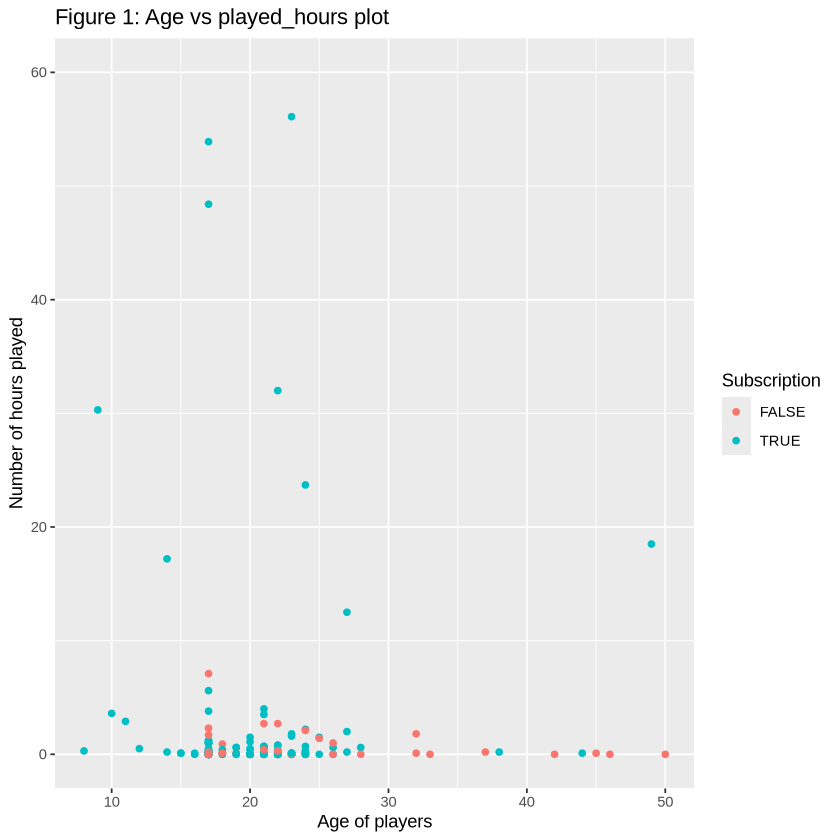

In [44]:
players_plot_1 <- players |> 
                ggplot(aes(x=Age, y = played_hours, color = subscribe)) + 
                geom_point() + 
                labs(x = "Age of players", y = "Number of hours played", color = "Subscription") + 
                ggtitle("Figure 1: Age vs played_hours plot") + 
                ylim(c(0, 60))
players_plot_1

This plot is not super helpful since most points overlap, however I will continue to apply classification to hopefully be able to use these predictor variables to predict subscribe

First step is to split the data into training and testing sets, and once that is done I created a spec for the KNN classification model using tune() so that we can find an optimal value of K to use for classifcation. Next  also created a recipe for this, and centered and scaled the variables, as KNN is performed using euclidean distance. I also created a tibble holding all the possible k values (here I picked to use K ranging from 1 to 10). And made player_vfold because I want to perform a 10-fold cross validation on his data.

In [45]:
set.seed(1)

players <- players |>
  mutate(subscribe = as_factor(subscribe)) 

players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
              set_engine("kknn") |>
              set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

player_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)
                

Now that the spec and recipe have also been created, the next step is to fit the data to our model using workflow, I have also tuned it for our cross validation model. I then collected metrics to find the accuracy values to check how well my classifer works. I filtered the results to separate only the accuracy values and K values

In [46]:
players_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = player_vfold, grid = k_vals) |>
    collect_metrics()


players_results

accuracies <- players_results |>
  filter(.metric == "accuracy")

accuracies

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 14 rows.
               ✖ Assigned data has 15 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 15 to size 14.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 13 rows.
               ✖ Assigned data has 14 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 14 to size 13.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4801282,8,0.06258975,Preprocessor1_Model01
1,roc_auc,binary,0.5044508,8,0.06902533,Preprocessor1_Model01
2,accuracy,binary,0.4705128,8,0.06696012,Preprocessor1_Model02
2,roc_auc,binary,0.4928977,8,0.07607630,Preprocessor1_Model02
3,accuracy,binary,0.5576923,8,0.06672124,Preprocessor1_Model03
3,roc_auc,binary,0.5398674,8,0.08396161,Preprocessor1_Model03
4,accuracy,binary,0.5493590,8,0.06528174,Preprocessor1_Model04
4,roc_auc,binary,0.5441288,8,0.08188752,Preprocessor1_Model04
5,accuracy,binary,0.5980769,8,0.05734275,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4801282,8,0.06258975,Preprocessor1_Model01
2,accuracy,binary,0.4705128,8,0.06696012,Preprocessor1_Model02
3,accuracy,binary,0.5576923,8,0.06672124,Preprocessor1_Model03
4,accuracy,binary,0.5493590,8,0.06528174,Preprocessor1_Model04
5,accuracy,binary,0.5980769,8,0.05734275,Preprocessor1_Model05
6,accuracy,binary,0.5814103,8,0.06224365,Preprocessor1_Model06
7,accuracy,binary,0.6756410,8,0.04590644,Preprocessor1_Model07
8,accuracy,binary,0.6756410,8,0.04414375,Preprocessor1_Model08
9,accuracy,binary,0.6423077,8,0.05608255,Preprocessor1_Model09


Now that we have collected metrics and filtered it to only include accuracies and K values we can plot it to better understand which K to pick

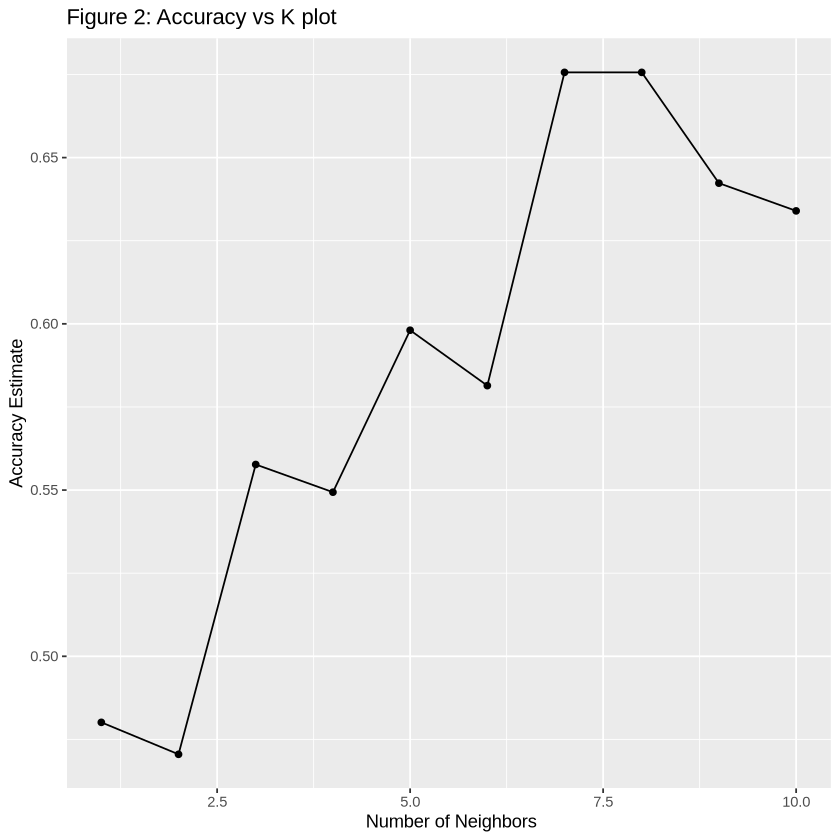

In [47]:
accuracy_plot<- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = " Number of Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 2: Accuracy vs K plot")


accuracy_plot

Now we want to find the best value of K which would hae the highest accuracy, according to the plot it is either 7 or 8. To find this K value we sort the accuracy in descendng order

In [48]:
k_value <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
k_value

[1] 7

In [49]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(player_spec) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.337931
Best kernel: rectangular
Best k: 7

Now we use the value of K we just found in our spec and fit our training data accordingly

Next we use the workflow we just created to predict values on the testing data set, and then we collect the accuracy value to check whether using played_hours and Age makes for a good classfier to predict subscribe

In [50]:
predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)|>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5918367


From this result, I find that the accuracy of my classifer is 59.18 percent which is pretty low, so my classifer did not work as intended.

Analysis: 

I used classification because I wanted to answer whether certain variables can be used to predict a categorical variable. 
There are weaknesses in my model because it has a really low accuracy value. I think if I could go back to make this better I might have used played_hours and 
experience as predictors variables. I also think that using 10 folds or splitting the data into 75:25 for training and testing would have affected the results I got. Overall, I figured that using classification over regression or clustering would work best for th question I came up with, despite my classifier not being the best, I am glad that I can tweak this model to get better results one day.
The future questions I have is: will changing the number of folds affect my results? will splitting the data initially change the results? and if using different predictor variables yield different results?
I also noticed a different type of error message, that I have not encountered and while it did not stop my code from running, I would like to learn about it more. 